In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

In [2]:
saws = wrangle.wrangle_saws()
saws.head(1)

,zipcode,location,year_month,gallons_consumed
Record #,,,,
274262,78229,ACCOLON DR,17-JAN,6733


In [3]:
saws_train, saws_validate, saws_test = wrangle.split_data(saws)

___

In [4]:
saws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145776 entries, 274262 to 545921
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   zipcode           145776 non-null  int64 
 1   location          145776 non-null  object
 2   year_month        145776 non-null  object
 3   gallons_consumed  145776 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.6+ MB


In [5]:
saws['test'] = saws['year_month']

In [6]:
saws[['year','month']] = saws.test.str.split("-",expand=True)

In [7]:
# set what we are going to create these dummies from
dummy_saws =  pd.get_dummies(saws['year'])
# Name the new columns
dummy_saws.columns = ['2017', '2018', 
                    '2019', '2020']
# add the dummies to the data frame
saws = pd.concat([saws, dummy_saws], axis=1)

In [8]:
saws.month.value_counts()

MAY    12148
JAN    12148
JUL    12148
NOV    12148
AUG    12148
OCT    12148
APR    12148
DEC    12148
FEB    12148
JUN    12148
SEP    12148
MAR    12148
Name: month, dtype: int64

In [9]:
# set what we are going to create these dummies from
dummy_saws =  pd.get_dummies(saws['month'])
# Name the new column
dummy_saws.columns = ['April', 'August', 'December', 'February', 'January', 'July',
                    'June', 'March', 'May', 'November', 'October', 'September']
# add the dummies to the data frame
saws = pd.concat([saws, dummy_saws], axis=1)

In [10]:
saws = saws.drop(columns=['zipcode', 'test'])

___
# Start Saws Exploration

In [11]:
sns.set(style="darkgrid")

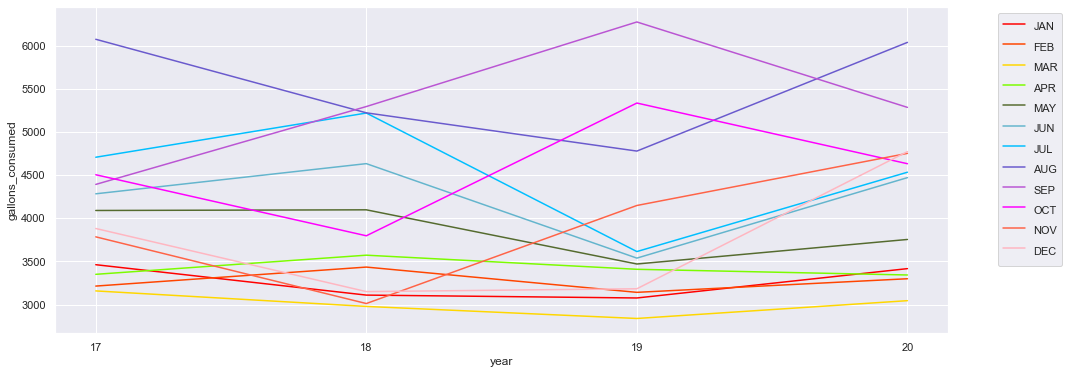

In [42]:
year_colors = ['red',  
                'orangered',  
                'gold',  
                'lawngreen',  
                'darkolivegreen',  
                'c',  
                'deepskyblue',  
                'slateblue', 
                'mediumorchid',  
                'magenta',  
                'tomato',  
                'lightpink'] 

plt.figure(figsize=(16,6))
sns.lineplot(y=saws.gallons_consumed, x=saws.year, 
             hue=saws.month, palette=year_colors, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

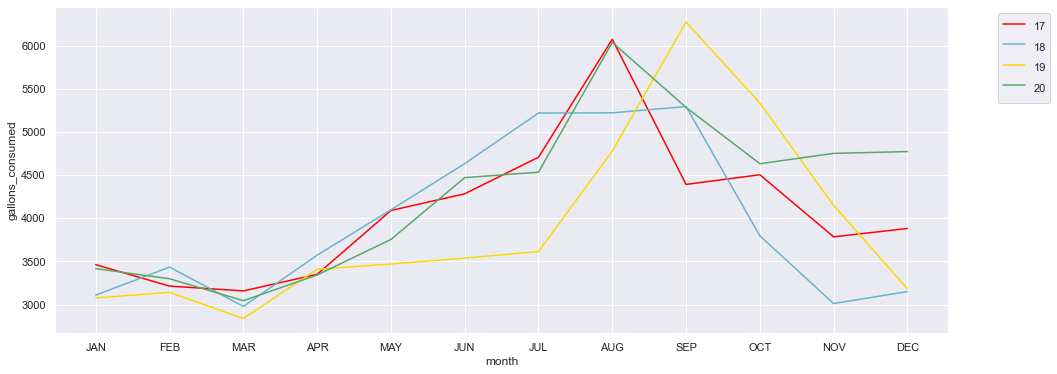

In [45]:
month_colors = ['red',  
                'c',  
                'gold',  
                'g'] 

plt.figure(figsize=(16,6))
sns.lineplot(y=saws.gallons_consumed, x=saws.month, 
             hue=saws.year, palette=month_colors, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)